In [1]:
#네이버 실검

#모듈 불러오기 (개발자들이 미리 만들어 놓은 도구 가방 가져오기)

#모듈 => 미리 내장된 모듈, 따로 설치받아야 하는 모듈 있음

#따로 설치받아야 되는 모듈 => pip, conda


from bs4 import BeautifulSoup
import requests #서버랑 통신하기 위한 모듈

In [30]:
url = 'https://www.cdc.go.kr/board.es?mid=a20501000000&bid=0015&act=view&list_no=367018' #통신 하고 싶은 페이지 
result = requests.get(url) #홈페이지 내용을 가져오도록 요청하는건 request, request 안에 get(메소드)함수

#result

tem = result.text #html 코드 불러오는게 .text 붙이기 

soup = BeautifulSoup(tem, 'html.parser') #tem을 BeautifulSoup로 가공, 파이썬에서 다룰 수 있도록 바꿔주는 모듈 => BeautifulSoup

table1 = soup.find_all('table')[0]
table2 = soup.find_all('table')[1]

from html_table_parser import parser_functions as parser
html_tb1 = parser.make2d(table1)
#html_tb1
html_tb2 = parser.make2d(table2)
#html_tb2

import pandas as pd
df1 = pd.DataFrame(html_tb1[2:], columns=html_tb1[1])
df2 = pd.DataFrame(html_tb2[1:8], columns=html_tb2[0])
#df2 = pd.DataFrame(html_tb2[:][1:], columns=html_tb2[:][0])

In [176]:
#df1

for k in range(3):
    df1['구분'][k] = df1['구분'][k].split('.(')[0]
    df1['확진자'][k] = df1['확진자'][k].replace(',','')
    df1['총계'][k] = df1['총계'][k].replace(',','')
    df1['격리해제'][k] = df1['격리해제'][k].replace(',','')
    df1['격리 중'][k] = df1['격리 중'][k].replace(',','')
    df1['사망'][k] = df1['사망'][k].replace(',','')
    df1['검사 중'][k] = df1['검사 중'][k].replace(',','')
    df1['결과 음성'][k] = df1['결과 음성'][k].replace(',','')
#df1

df1['확진자'][2] = df1['확진자'][2].split(')')[1]
df1['총계'][2] = df1['총계'][2].split(')')[1]
df1['격리해제'][2] = df1['격리해제'][2].split(')')[1]
df1['격리 중'][2] = df1['격리 중'][2].split(')')[1]
df1['사망'][2] = df1['사망'][2].split(')')[1]
df1['검사 중'][2] = df1['검사 중'][2].split(')')[1]
df1['결과 음성'][2] = df1['결과 음성'][2].split(')')[1]
df1

,구분,확진자,총계,격리해제,격리 중,사망,검사 중,결과 음성
0,4. 27,601660,10738,8764,1731,243,8895,582027
1,4. 28,608514,10752,8854,1654,244,9203,588559
2,변동,6854,14,90,77,1,308,6532


In [172]:
#df2

df2 = df2.rename(columns={'대\n구':'대구', '경\n북':'경북', '제\n주':'제주'})
#df2

for k in range(7):
    df2['합계'][k] = df2['합계'][k].replace(',','')
    df2['대구'][k] = df2['대구'][k].replace(',','')
    df2['경북'][k] = df2['경북'][k].replace(',','')
df2

,구분,합계,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,격리중,1654,204,18,623,30,5,5,6,11,185,14,5,19,8,5,194,20,6,296
1,격리해제,8854,427,116,6056,63,25,35,36,35,475,37,40,123,10,10,1119,97,7,143
2,사망,244,2,3,170,0,0,0,1,0,14,2,0,0,0,0,52,0,0,0
3,합계,10752,633,137,6849,93,30,40,43,46,674,53,45,142,18,15,1365,117,13,439
4,신규,14,4,0,2,1,0,0,0,0,3,0,0,0,0,0,1,0,0,3
5,해외유입(잠정),12,4,0,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3
6,지역발생(잠정),2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


ValueError: could not convert string to float: '1,654'

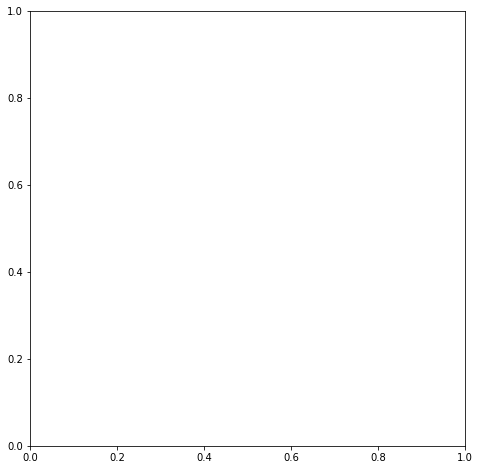

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

explode =[0.1, 0.1, 0.1, 0.1]
plt.figure(1, figsize=(8, 8))
plt.pie(df2['합계'], explode=explode, labels=df2['구분'])
plt.title('Rainy days by season')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# make a square figure and axes
# pie chart looks best in square figures
# otherwise it looks like ellipses
plt.figure(1, figsize=(8, 8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Spring', 'Summer', 'Autumn', 'Winter'
values = [15, 16, 16, 28]
explode =[0.1, 0.1, 0.1, 0.1]

# make a pie 
plt.pie(values, explode=explode, labels=labels,
    autopct='%1.1f%%', startangle=67)

plt.title('Rainy days by season')

plt.show()